In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Number object for performing string based bitwise operations,
# which is basically like a tiny version of a HDL for logic gates
class Number():
    

    def __init__(self, number):
        self.bits = np.binary_repr(number, width=8)
    
    def __repr__(self):
        return self.bits
        
    def flip(self):
        self.bits = Number.not_op(self.bits)
    
    def __iadd__(self, other):
        self.bits = Number.add_op(self.bits, other.bits)
        return self
    
    def __neg__(self):
        self.flip()
        self += Number(1)
        return self

    @staticmethod
    def and_op(a, b):
        return ''.join('1' if a[i] == '1' and b[i] == '1' else '0' for i in range(len(a)))

    @staticmethod
    def or_op(a, b):
        return ''.join('1' if a[i] == '1' or b[i] == '1' else '0' for i in range(len(a)))

    @staticmethod
    def xor_op(a, b):
        return ''.join('1' if a[i] != b[i] else '0' for i in range(len(a)))

    @staticmethod
    def not_op(a):
        return ''.join('1' if bit == '0' else '0' for bit in a)

    @staticmethod
    def add_op(a, b):
        a = list(a)
        b = list(b)
        carry = 0
        for i in range(len(a) - 1, -1, -1):
            a[i] = int(a[i])
            b[i] = int(b[i])
            a[i], carry = (a[i] ^ b[i] ^ carry), (a[i] & b[i]) | (a[i] & carry) | (b[i] & carry)
        return ''.join(str(bit) for bit in a)
    
    @property
    def decimal(self):
        return int(self.bits, 2)
    
    @property
    def signed(self):
        return self.decimal - 256 if self.bits[0] == '1' else self.decimal

In [4]:
for i in range(4):
    print("______________________")
    a = Number(5+i)
    print(" a:", a, " | decimal : ", a.decimal) 
    -a 
    print("-a:", a, " | decimal : ", a.decimal)

______________________
 a: 00000101  | decimal :  5
-a: 11111011  | decimal :  251
______________________
 a: 00000110  | decimal :  6
-a: 11111010  | decimal :  250
______________________
 a: 00000111  | decimal :  7
-a: 11111001  | decimal :  249
______________________
 a: 00001000  | decimal :  8
-a: 11111000  | decimal :  248


In [5]:
def test_add(a,b):
    print("______________________")
    a = Number(a)
    b = Number(b)

    print(a.bits + " : " + str(int(a.bits, 2)))
    print("+")
    print(b.bits + " : " + str(int(b.bits, 2)))
    a += b
    print("=")
    print(a.bits + " : " + str(int(a.bits, 2)))


In [6]:
test_add(127, 1)
test_add(127, 2)
test_add(127, 3)
test_add(127, 4)

______________________
01111111 : 127
+
00000001 : 1
=
10000000 : 128
______________________
01111111 : 127
+
00000010 : 2
=
10000001 : 129
______________________
01111111 : 127
+
00000011 : 3
=
10000010 : 130
______________________
01111111 : 127
+
00000100 : 4
=
10000011 : 131


In [7]:
a = Number(149)
print(a)
print("flip")
a.flip()
print(a)

10010101
flip
01101010


In [8]:
# negative_numbers = []
# for binary in binary_numbers:
#     flipped_bits = ''.join('1' if bit == '0' else '0' for bit in binary)
#     negative_number = int(flipped_bits, 2) + 1
#     negative_numbers.append(negative_number)


# negative_numbers = []
# for binary in binary_numbers:
#     flipped_bits = ''.join('1' if bit == '0' else '0' for bit in binary)
    
#     # Check if the most significant bit is 1 (indicating a negative number)
#     if flipped_bits[0] == '1':
#         # Convert the binary representation to a negative number
#         # The value is -128 (because the MSB is 1) plus the value of the remaining 7 bits
#         value = -128 + int(flipped_bits[1:], 2)
#     else:
#         # If the MSB is 0, it's a positive number, so we simply convert it to an integer
#         value = int(binary, 2)
#     negative_numbers.append(value)




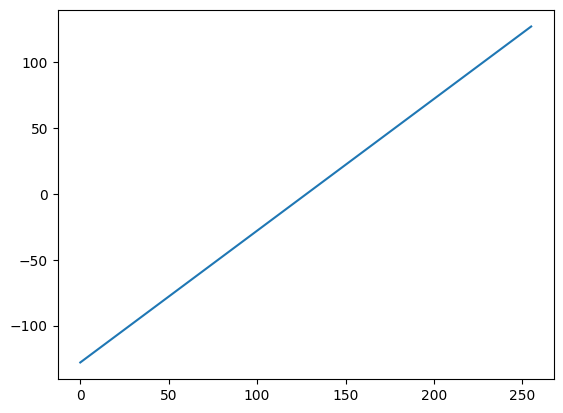

In [9]:
x = [i for i in range(256)]
# what I want : 
y = [i-128 for i in x]
#y = negative_numbers

plt.plot(x,y)

In [10]:
#so I want to take -128 + x and represent it as a unsigned integer

a = Number(149)
print(a)

10010101


In [13]:
b = Number(149-128)
print(b)

00010101


So if the leading bit is one, it allows us to remove 128 to send the right half of the curve where it needs to be.
If the leading bit is not one, what do we do ?

In [14]:
c = Number(65)
print(c)

01000001


In [20]:
c = Number(65)
print(c)
d = Number.xor_op('10000000', c.bits)
print(d)
D = Number(0)
D.bits = d
D.signed



01000001
11000001


-63

In [21]:
65 - 128

-63

So the solution is just XOR with 10000000 and then use the correct signed comparison gate
This is the perfect transformation : the one that conserves the ordering of both spaces at the same time as it is a bijection

In [11]:
print([f"{x} -> {y}" for x, y in zip(x, y)])

['0 -> -128', '1 -> -127', '2 -> -126', '3 -> -125', '4 -> -124', '5 -> -123', '6 -> -122', '7 -> -121', '8 -> -120', '9 -> -119', '10 -> -118', '11 -> -117', '12 -> -116', '13 -> -115', '14 -> -114', '15 -> -113', '16 -> -112', '17 -> -111', '18 -> -110', '19 -> -109', '20 -> -108', '21 -> -107', '22 -> -106', '23 -> -105', '24 -> -104', '25 -> -103', '26 -> -102', '27 -> -101', '28 -> -100', '29 -> -99', '30 -> -98', '31 -> -97', '32 -> -96', '33 -> -95', '34 -> -94', '35 -> -93', '36 -> -92', '37 -> -91', '38 -> -90', '39 -> -89', '40 -> -88', '41 -> -87', '42 -> -86', '43 -> -85', '44 -> -84', '45 -> -83', '46 -> -82', '47 -> -81', '48 -> -80', '49 -> -79', '50 -> -78', '51 -> -77', '52 -> -76', '53 -> -75', '54 -> -74', '55 -> -73', '56 -> -72', '57 -> -71', '58 -> -70', '59 -> -69', '60 -> -68', '61 -> -67', '62 -> -66', '63 -> -65', '64 -> -64', '65 -> -63', '66 -> -62', '67 -> -61', '68 -> -60', '69 -> -59', '70 -> -58', '71 -> -57', '72 -> -56', '73 -> -55', '74 -> -54', '75 -

In [12]:
help(np.binary_repr)

Help on function binary_repr in module numpy:

binary_repr(num, width=None)
    Return the binary representation of the input number as a string.
    
    For negative numbers, if width is not given, a minus sign is added to the
    front. If width is given, the two's complement of the number is
    returned, with respect to that width.
    
    In a two's-complement system negative numbers are represented by the two's
    complement of the absolute value. This is the most common method of
    representing signed integers on computers [1]_. A N-bit two's-complement
    system can represent every integer in the range
    :math:`-2^{N-1}` to :math:`+2^{N-1}-1`.
    
    Parameters
    ----------
    num : int
        Only an integer decimal number can be used.
    width : int, optional
        The length of the returned string if `num` is positive, or the length
        of the two's complement if `num` is negative, provided that `width` is
        at least a sufficient number of bits for